In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np


# Ring Modulation Basic

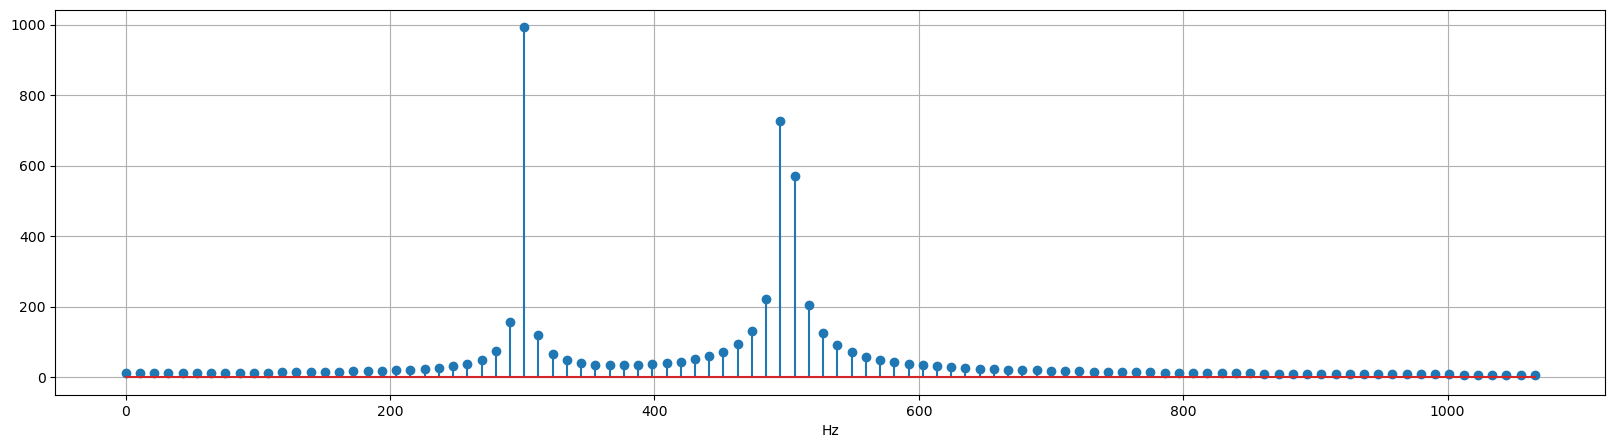

In [2]:
fc = 400
fm = 100   # change this frequency from 1, 2, 5, 10, 20, 100, 200
dur = 1
fs = 44100

x_c = np.sin(2*np.pi*fc*np.arange(dur*fs)/fs)
x_m = np.sin(2*np.pi*fm*np.arange(dur*fs)/fs)

# ring modulation
y = x_c*x_m;

win_size = 4096
FFT_size = 4096

y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:100]
f = fs/FFT_size*np.arange(100)

# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)


ipd.Audio(y, rate=fs)


# Ring Modulation with Sawtooth

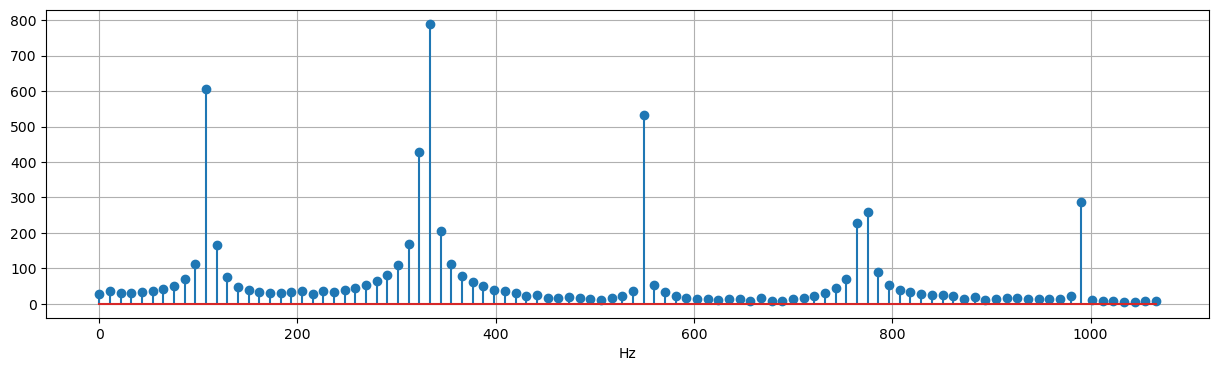

In [5]:
def sawtooth_osc(f0, dur, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency

    phase_inc = 2/(fs/f0)
    phase = 0
    x = np.zeros(int(fs*dur))
    
    for n in range(len(x)):
        phase = phase + phase_inc
        if (phase > 1):
            phase = phase - 2
            
        x[n] = phase
        
    return x    


# sawtooth oscillator
fs = 44100
f0 = 220
dur = 1
x_saw = sawtooth_osc(f0, dur, fs)


# modulating oscillator
fm = 110 # change this frequency from 1, 2, 5, 10, 20, 110, 220

x_m = np.sin(2*np.pi*fm*np.arange(len(x_saw))/fs);

# ring modulation
y = x_saw*x_m;


# display
win_size = 4096
FFT_size = 4096

y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:100]
f = fs/FFT_size*np.arange(100)

# plot linear scale
plt.figure(figsize=(15, 4))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)

ipd.Audio(y, rate=fs)



# Alien Sound Effect with RM

In [6]:
#x, fs = librosa.load("../audio/jobs.wav") 
x, fs = librosa.load("../audio/suzanne.wav") 


# modulating oscillator
fm = 100

x_m = np.sin(2*np.pi*fm*np.arange(len(x))/fs);

# ring modulation
y = x*x_m;

ipd.Audio(y, rate=fs)



# FM Synthesis Basic


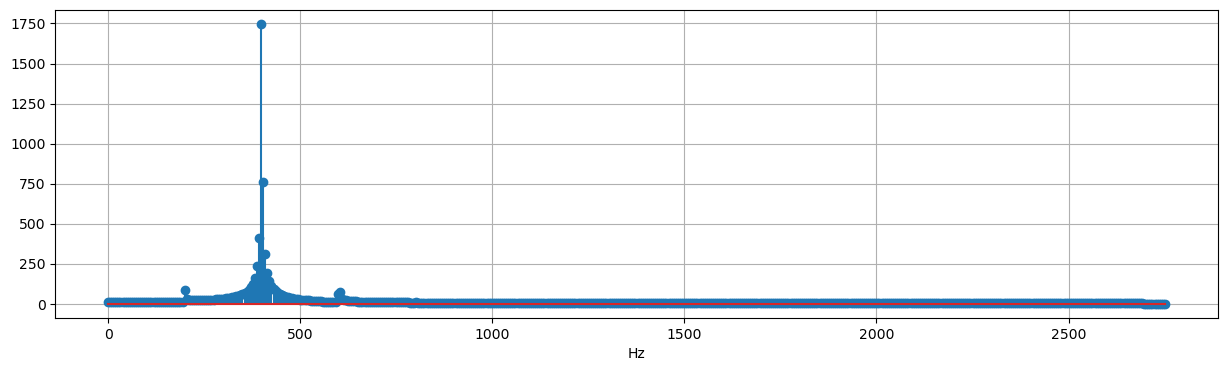

In [7]:
fs = 22050         # sampling rate 

fc = 400
fm = 200   # change this frequency from 1, 2, 5, 10, 20, 100, 200

beta = 0.1       # beta parameters in FM
dur = 2 

x = np.sin(2*np.pi*fc*np.arange(dur*fs)/fs + beta*np.sin(2*np.pi*fm*np.arange(dur*fs)/fs))
    
win_size = 4096
FFT_size = 4096
x_seg = x[:win_size]
X= np.fft.fft(x_seg)
X_mag = np.abs(X)
X_mag2 = X_mag[:int(win_size/8)]
f = fs/FFT_size*np.arange(int(win_size/8))
plt.figure(figsize=(15, 4))
plt.stem(f,X_mag2)
plt.xlabel('Hz')
plt.grid(True)
    
ipd.Audio(x, rate=fs)

# FM Synthesis: Basic Tone


In [8]:
fs = 22050         # sampling rate 
fc = 220           # carrier frequency
fm = 110           # modulation frequency 
note_dur = 1       # length in second
beta = 10          # beta parameters in FM
attack_time = 0.01 # attack time in second

# amplitude envelope
env_attack = np.linspace(0,1,int(attack_time*fs))
env_decay = np.logspace(np.log10(1),np.log10(0.1), note_dur*fs-len(env_attack))
env = np.append(env_attack, env_decay)

# generate FM oscillator
t = np.linspace(0, note_dur, note_dur*fs)
x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t))

# apply the ampltidue envelope
x_note_env = np.multiply(x_note, env)
    
ipd.Audio(x_note_env, rate=fs)

# FM Synthesis: Bell Sound

In [9]:
fs = 22050         # sampling rate 
fc = 200           # carrier frequency
fm = 280           # modulation frequency 
note_dur = 3       # length in second
beta_max = 5      # beta parameters in FM
attack_time = 0.01 # attack time in second


# amplitude envelope
env_attack = np.linspace(0,1,int(attack_time*fs))
env_decay = np.logspace(np.log10(1),np.log10(0.1), note_dur*fs-len(env_attack))
env = np.append(env_attack, env_decay)

# beta
beta = beta_max*env

# FM oscillator
t = np.linspace(0,note_dur, note_dur*fs)
x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

# apply the ampltidue envelope
x_note_env = np.multiply(x_note, env)
    
ipd.Audio(x_note_env, rate=fs)

# FM Synthesis: Brass Instrument

In [10]:
fs = 22050         # sampling rate 
note_dur = 2       # length in second
beta_max = 5       # beta parameters in FM
attack_time = 0.3  # attack time in second

# MIDI note number: C4=60, C5=72, ... 
notes = [60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
note_legnths = [1,1,1,1,1,1,2,1,1,1,1,1,1,2]

# envelope
attack_time = 0.01 # second

x = []
for i in range(len(notes)):    
    # fundamental frequency
    f0= 440*np.power(2.0,(notes[i]-69)/12)
    note_dur = note_legnths[i]*0.5

    # amplitude envelope
    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(0.3), int(note_dur*fs)-len(env_attack))
    env = np.append(env_attack, env_decay)

    # beta
    beta = beta_max*env

    # FM oscillator
    fc = f0
    fm = f0
    t = np.linspace(0, note_dur, int(note_dur*fs))
    x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

    # apply the ampltidue envelope
    x_note_env = np.multiply(x_note, env)
    
    # concatenate notes
    x = np.append(x, x_note_env)
    
ipd.Audio(x, rate=fs)



# FM Synthesis: Electric Piano

In [11]:
fs = 22050         # sampling rate 
note_dur = 2       # length in second
beta_max = 3       # beta parameters in FM
attack_time = 0.05  # attack time in second

# MIDI note number: C4=60, C5=72, ... 
notes = [60, 60, 67, 67, 69, 69, 67, 65, 65, 64, 64, 62, 62, 60]
note_legnths = [1,1,1,1,1,1,2,1,1,1,1,1,1,2]

# envelope
attack_time = 0.01 # second

x = []
for i in range(len(notes)):    
    # fundamental frequency
    f0= 440*np.power(2.0,(notes[i]-69)/12)
    note_dur = note_legnths[i]*0.5

    # amplitude envelope
    env_attack = np.linspace(0,1,int(attack_time*fs))
    env_decay = np.logspace(np.log10(1),np.log10(0.1), int(note_dur*fs)-len(env_attack))
    env = np.append(env_attack, env_decay)

    # beta
    beta = beta_max*env

    # FM oscillator
    fc = f0
    fm = 10*fc
    t = np.linspace(0, note_dur, int(note_dur*fs))
    x_note = np.sin(2*np.pi*fc*t + beta*np.sin(2*np.pi*fm*t));

    # apply the ampltidue envelope
    x_note_env = np.multiply(x_note, env)
    
    # concatenate notes
    x = np.append(x, x_note_env)
    
ipd.Audio(x, rate=fs)



# WaveShaping Synthesis Basic

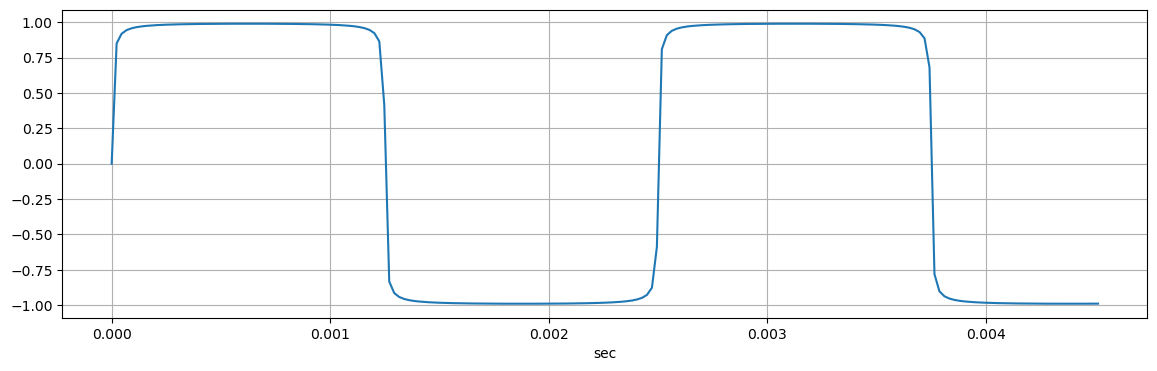

<Figure size 1000x200 with 0 Axes>

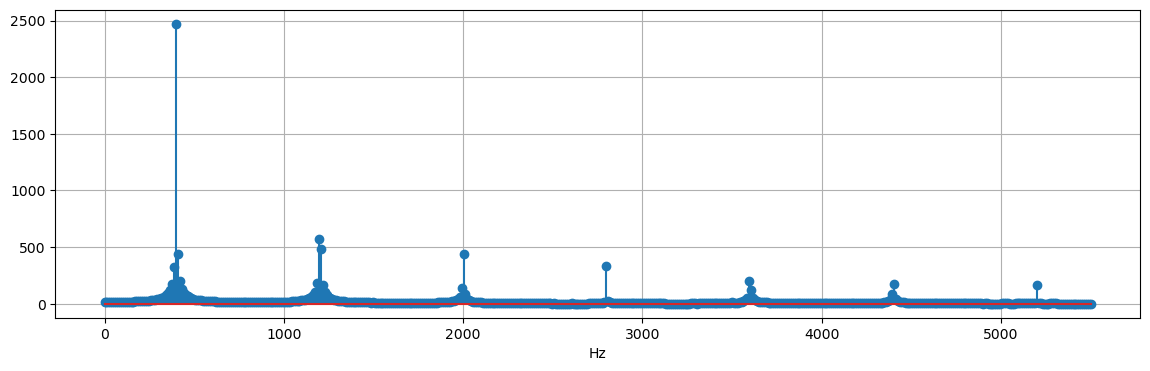

In [12]:
fc = 400
dur = 1
fs = 44100

x = np.sin(2*np.pi*fc*np.arange(dur*fs)/fs)
y = np.zeros(len(x))

gain = 100

# transfer function
for i in range(len(x)):
    x2 = gain*x[i]
    y[i] = x2/(1+np.abs(x2))
    
plt.figure(figsize=(14, 4))

n= np.arange(200)

plt.plot(n/fs, y[:200])
plt.grid(True)
plt.xlabel('sec')    
    
plt.figure(figsize=(10, 2))

win_size = 4096
FFT_size = 4096
y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:int(win_size/8)]
f = fs/FFT_size*np.arange(int(win_size/8))

plt.figure(figsize=(14, 4))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)
ipd.Audio(y, rate=fs)


# WaveShaping by Chebyshev Polynomial

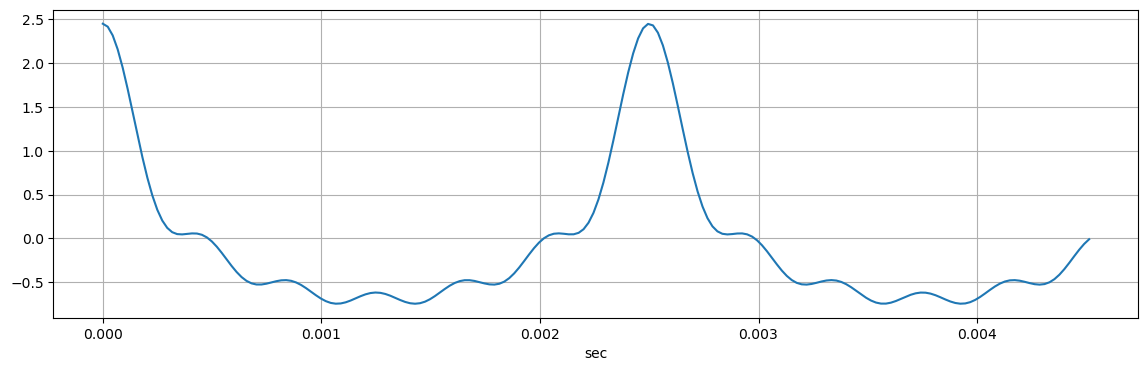

<Figure size 1000x200 with 0 Axes>

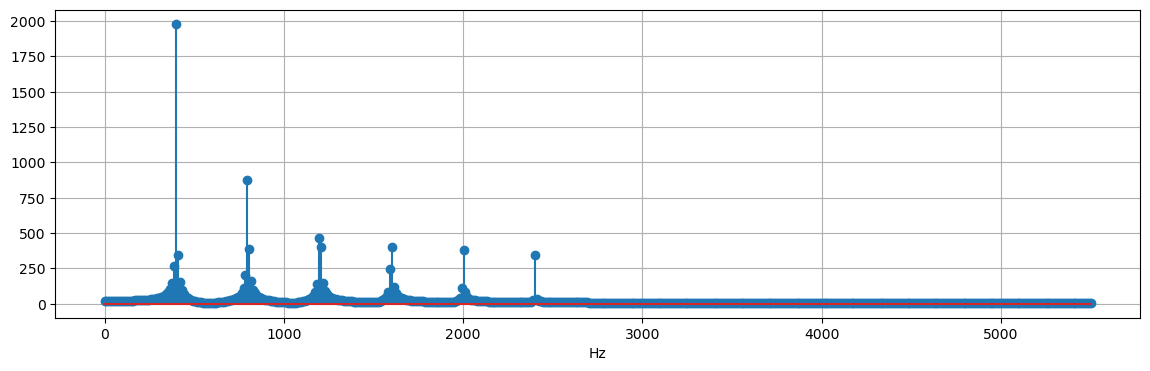

In [13]:
fc = 400
dur = 1
fs = 44100

x = np.cos(2*np.pi*fc*np.arange(dur*fs)/fs)
y = np.zeros(len(x))

# Chebyshev polynomical
for i in range(len(x)):
    z = x[i]
    T1 = z
    T2 = 2*z*z-1
    T3 = 4*z*z*z-3*z
    T4 = 8*z*z*z*z-8*z*z+1
    T5 = 16*z*z*z*z*z-20*z*z*z+5*z
    T6 = 32*z*z*z*z*z*z-48*z*z*z*z+18*z*z-1
        
    y[i] = T1+T2/2+T3/3+T4/4+T5/5+T6/6
    
plt.figure(figsize=(14, 4))

n= np.arange(200)

plt.plot(n/fs, y[:200])
plt.grid(True)
plt.xlabel('sec')    
    
plt.figure(figsize=(10, 2))

win_size = 4096
FFT_size = 4096
y_seg = y[:win_size]
Y= np.fft.fft(y_seg)
Y_mag = np.abs(Y)
Y_mag2 = Y_mag[:int(win_size/8)]
f = fs/FFT_size*np.arange(int(win_size/8))

plt.figure(figsize=(14, 4))
plt.stem(f,Y_mag2)
plt.xlabel('Hz')
plt.grid(True)
ipd.Audio(y, rate=fs)
